# Yellowbrick Classification Visualizers

This notebook serves as a quick reference to the Yellowbrick functionality with regards to classification visualizers.

Source: https://www.scikit-yb.org/en/latest/api/classifier/index.html

## Classification Report

[]() | []()
---------- | -------------
Visualizer | ```ClassificationReport```
Quick Method | ```classification_report()```
Models | Classification
Workflow | Model Evaluation

In [1]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
import numpy as np

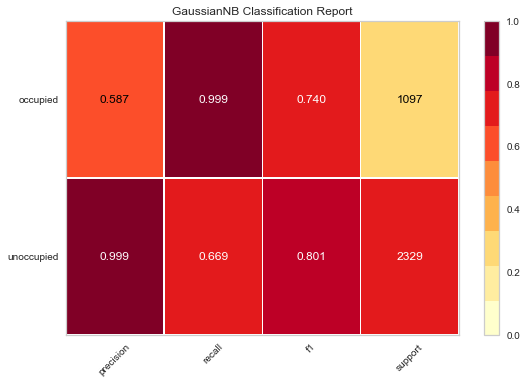

In [3]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.naive_bayes import GaussianNB

from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy

# Load the classification dataset
X, y = load_occupancy()

# Specify the target classes
classes = ["unoccupied", "occupied"]

# Create the training and test data
tscv = TimeSeriesSplit()
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Instantiate the classification model and visualizer
model = GaussianNB()
visualizer = ClassificationReport(model, classes=classes, support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

### Quick Method

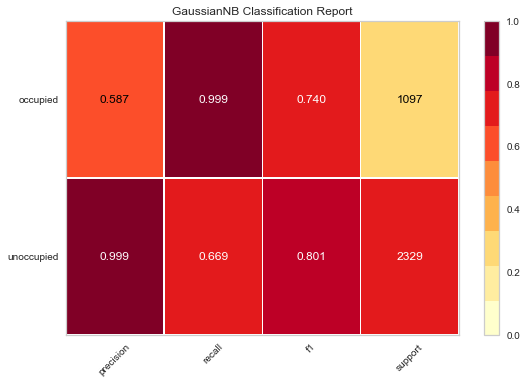

In [4]:
from yellowbrick.classifier import classification_report

# Load the classification data set
X, y = load_occupancy()

# Specify the target classes
classes = ["unoccupied", "occupied"]

# Create the training and test data
tscv = TimeSeriesSplit()
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Instantiate the visualizer
visualizer = classification_report(
    GaussianNB(), X_train, y_train, X_test, y_test, classes=classes, support=True
)

## Confusion Matrix

[]() | []()
---------- | -------------
Visualizer | ```ConfusionMatrix```
Quick Method | ```confusion_matrix()```
Models | Classification
Workflow | Model Evaluation

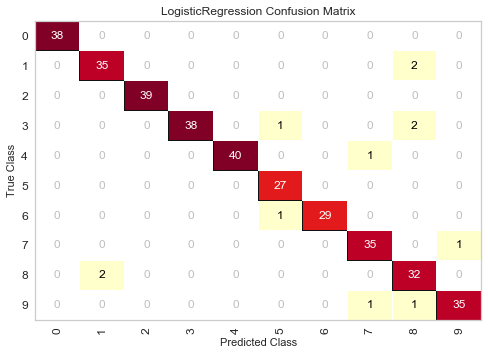

In [6]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix

# We'll use the handwritten digits data set from scikit-learn.
# Each feature of this dataset is an 8x8 pixel image of a handwritten number.
# Digits.data converts these 64 pixels into a single array of features
digits = load_digits()
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = tts(X, y, test_size =0.2, random_state=11)

model = LogisticRegression(multi_class="auto", solver="liblinear")

# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(model, classes=[0,1,2,3,4,5,6,7,8,9])

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.show()

### Plotting with class names

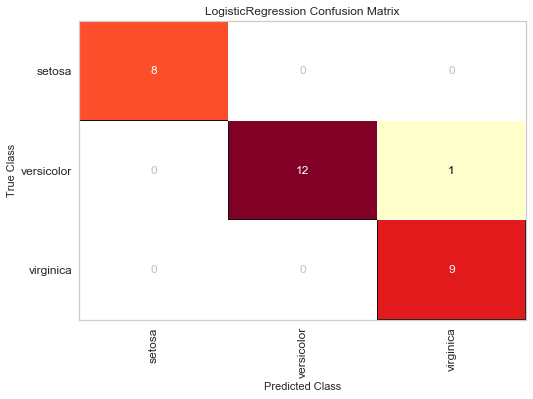

In [11]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix

iris = load_iris()
X = iris.data
y = iris.target
classes = iris.target_names

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2)

model = LogisticRegression(multi_class="auto", solver="liblinear")

iris_cm = ConfusionMatrix(
    model, classes=classes,
    label_encoder={0: 'setosa', 1: 'versicolor', 2: 'virginica'}
)

iris_cm.fit(X_train, y_train)
iris_cm.score(X_test, y_test)

iris_cm.show()

### Quick Method

C:\Users\aronf\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


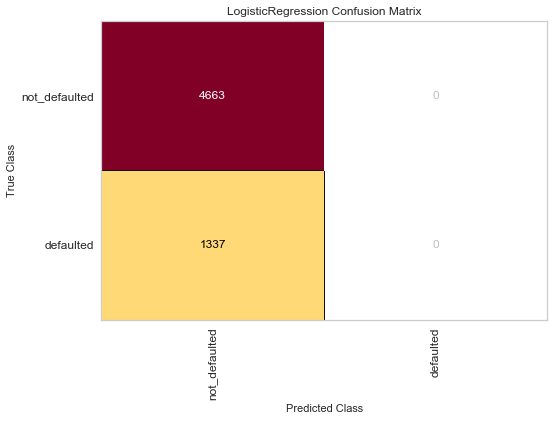

<Figure size 576x396 with 0 Axes>

In [19]:
from yellowbrick.datasets import load_credit
from yellowbrick.classifier import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split as tts

#Load the classification dataset
X, y = load_credit()

#Create the train and test data
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2)

# Instantiate the visualizer with the classification model
confusion_matrix(
    LogisticRegression(),
    X_train, y_train, X_test, y_test,
    classes=['not_defaulted', 'defaulted']
)
plt.tight_layout()

## ROCAUC

[]() | []()
---------- | -------------
Visualizer | ```ROCAUC```
Quick Method | ```roc_auc()```
Models | Classification
Workflow | Model Evaluation

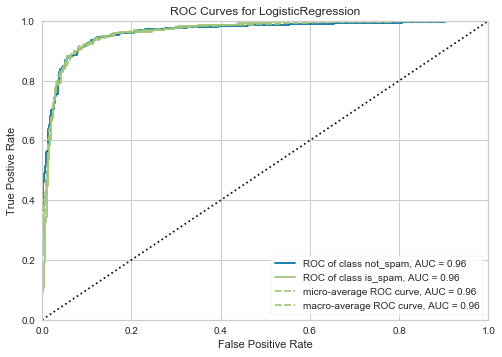

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from yellowbrick.classifier import ROCAUC
from yellowbrick.datasets import load_spam

# Load the classification dataset
X, y = load_spam()

# Create the training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Instantiate the visualizer with the classification model
model = LogisticRegression(multi_class="auto", solver="liblinear")
visualizer = ROCAUC(model, classes=["not_spam", "is_spam"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

### Multi-class ROCAUC Curves

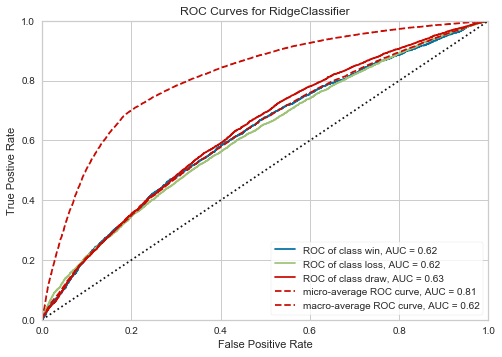

In [22]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

from yellowbrick.classifier import ROCAUC
from yellowbrick.datasets import load_game

# Load multi-class classification dataset
X, y = load_game()

# Encode the non-numeric columns
X = OrdinalEncoder().fit_transform(X)
y = LabelEncoder().fit_transform(y)

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Instaniate the classification model and visualizer
model = RidgeClassifier()
visualizer = ROCAUC(model, classes=["win", "loss", "draw"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and render the figure

### Quick Method

C:\Users\aronf\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


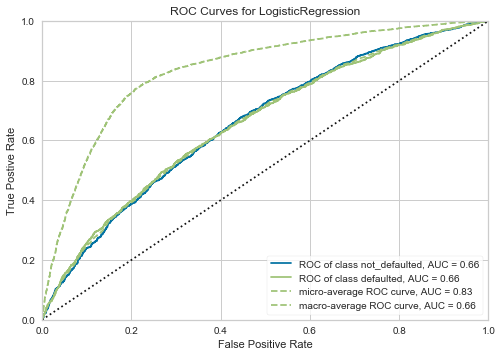

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001F855ADAA08>,
       classes=['not_defaulted', 'defaulted'], model=None)

In [23]:
from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.datasets import load_credit
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#Load the classification dataset
X, y = load_credit()

#Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y)

# Instantiate the visualizer with the classification model
model = LogisticRegression()
roc_auc(model, X_train, y_train, X_test=X_test, y_test=y_test, classes=['not_defaulted', 'defaulted'])

## Precision-Recall Curves

[]() | []()
---------- | -------------
Visualizer | ```PrecisionRecallCurve```
Quick Method | ```precision_recall_curve()```
Models | Classification
Workflow | Model Evaluation

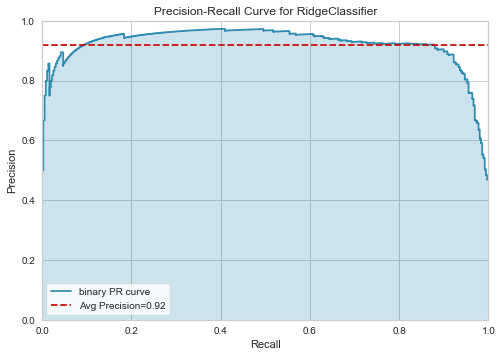

In [24]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split as tts
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.datasets import load_spam

# Load the dataset and split into train/test splits
X, y = load_spam()

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, shuffle=True)

# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(RidgeClassifier())
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

### Multi-Label Classification

To support multi-label classification, the estimator is wrapped in a OneVsRestClassifier to produce binary comparisons for each class (e.g. the positive case is the class and the negative case is any other class). The Precision-Recall curve is then computed as the micro-average of the precision and recall for all classes:

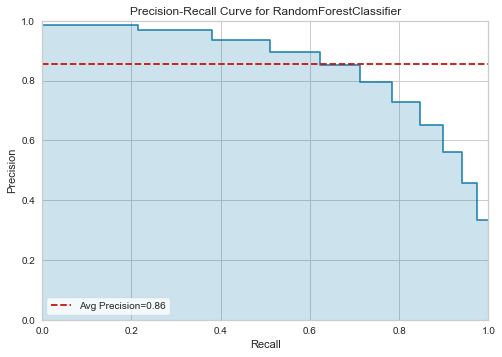

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split as tts
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.datasets import load_game

# Load dataset and encode categorical variables
X, y = load_game()
X = OrdinalEncoder().fit_transform(X)
y = LabelEncoder().fit_transform(y)

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, shuffle=True)

# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(RandomForestClassifier(n_estimators=10))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

### Complex Precision-Recall

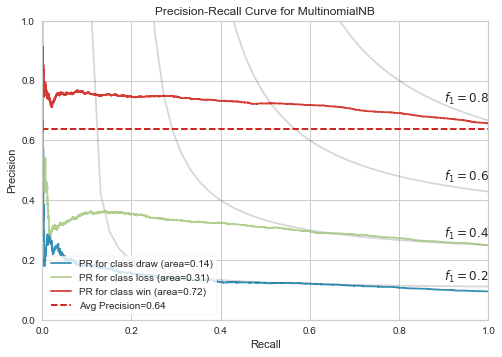

In [29]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split as tts
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.datasets import load_game

# Load dataset and encode categorical variables
X, y = load_game()
X = OrdinalEncoder().fit_transform(X)
encoder = LabelEncoder()
y = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, shuffle=True)

# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(
    MultinomialNB(), per_class=True, iso_f1_curves=True,
    fill_area=False, micro=False, classes=encoder.classes_
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()
plt.show()

### Quick Method

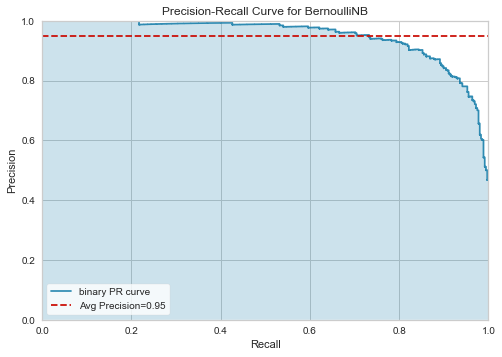

In [27]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split as tts
from yellowbrick.classifier import precision_recall_curve
from yellowbrick.datasets import load_spam

# Load the dataset and split into train/test splits
X, y = load_spam()

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, shuffle=True)

# Create the visualizer, fit, score, and show it
viz = precision_recall_curve(BernoulliNB(), X_train, y_train, X_test, y_test)

## Class Prediction Error

[]() | []()
---------- | -------------
Visualizer | ```ClassPredictionError```
Quick Method | ```class_prediction_error()```
Models | Classification
Workflow | Model Evaluation

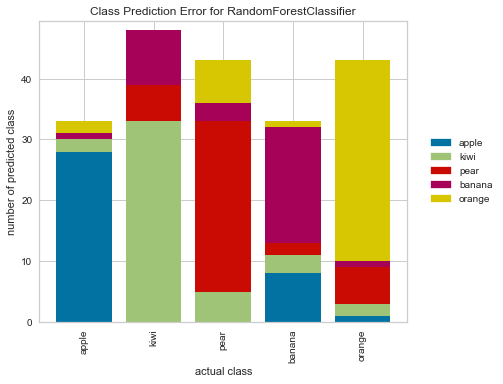

In [28]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ClassPredictionError


# Create classification dataset
X, y = make_classification(
    n_samples=1000, n_classes=5, n_informative=3, n_clusters_per_class=1,
    random_state=36,
)

classes = ["apple", "kiwi", "pear", "banana", "orange"]

# Perform 80/20 training/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,
                                                    random_state=42)
# Instantiate the classification model and visualizer
visualizer = ClassPredictionError(
    RandomForestClassifier(random_state=42, n_estimators=10), classes=classes
)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

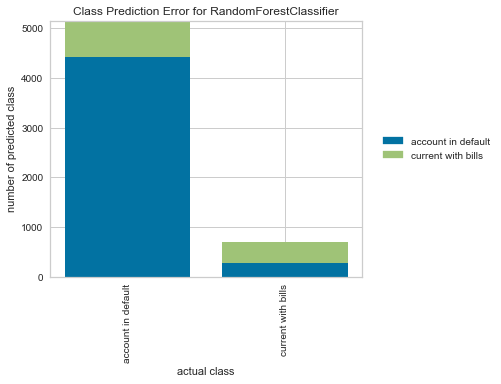

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.datasets import load_credit

X, y = load_credit()

classes = ['account in default', 'current with bills']

# Perform 80/20 training/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,
                                                    random_state=42)

# Instantiate the classification model and visualizer
visualizer = ClassPredictionError(
    RandomForestClassifier(n_estimators=10), classes=classes
)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

### Quick Method

C:\Users\aronf\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


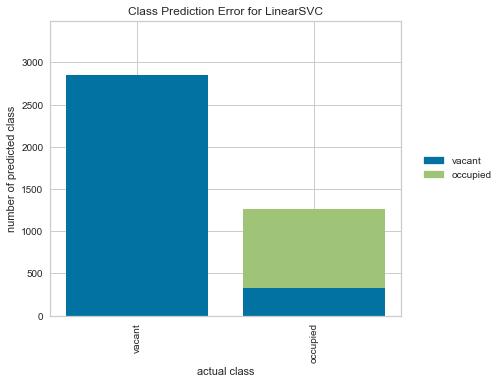

ClassPredictionError(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001F856CD9188>,
                     classes=['vacant', 'occupied'], model=None)

In [31]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split as tts
from yellowbrick.classifier import class_prediction_error
from yellowbrick.datasets import load_occupancy

# Load the dataset and split into train/test splits
X, y = load_occupancy()
X_train, X_test, y_train, y_test = tts(
    X, y, test_size=0.2, shuffle=True
)

class_prediction_error(
    LinearSVC(random_state=42),
    X_train, y_train, X_test, y_test,
    classes=["vacant", "occupied"]
)

## Discrimination Threshold

[]() | []()
---------- | -------------
Visualizer | ```DiscriminationThreshold```
Quick Method | ```discrimination_threshold()```
Models | Classification
Workflow | Model Evaluation

__Note:__ Only works for binary classification

C:\Users\aronf\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\aronf\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\aronf\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\aronf\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


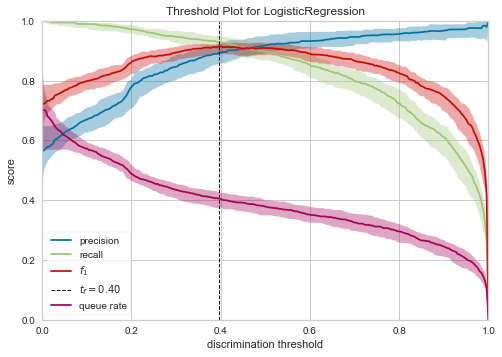

In [33]:
from sklearn.linear_model import LogisticRegression

from yellowbrick.classifier import DiscriminationThreshold
from yellowbrick.datasets import load_spam

# Load a binary classification dataset
X, y = load_spam()

# Instantiate the classification model and visualizer
model = LogisticRegression(multi_class="auto", solver="liblinear")
visualizer = DiscriminationThreshold(model)

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

### Quick Method

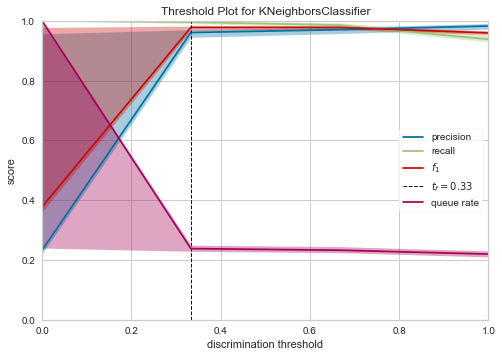

DiscriminationThreshold(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001F856CDEFC8>,
                        force_model=None, model=None)

In [35]:
from yellowbrick.classifier.threshold import discrimination_threshold
from yellowbrick.datasets import load_occupancy
from sklearn.neighbors import KNeighborsClassifier

#Load the classification dataset
X, y = load_occupancy()

# Instantiate the visualizer with the classification model
model = KNeighborsClassifier(3)

discrimination_threshold(model, X, y)